# Intro to Natural Language Processing (NLP)

The Natural Language Processing (NLP) field is incredibly vast, and it has applications in virtually every aspect of data science. In this notebook, we will walk through a **very brief** survey of NLP, and provide some instruction on a couple handy tools along the way.

NLP tools span a wide range of implementations, and it is not uncommon for NLP packages to have conflicts with other Python libraries. So, to keep everything compatible in one place, it is recommended that you create a new pip environment for NLP projects. To set up an NLP pip environment for this lab, follow the steps in the "Pip Environment" section of the [Python Environment Setup page in Canvas](https://iu.instructure.com/courses/2181786/pages/week-1-%7C-python-environment-setup?module_item_id=30340853), and **use the *environment.yml* file provided in this folder.** This should install the packages you'll need for this lab.

Next, **[download a spaCy NLP model](https://spacy.io/models)** based on your preferences (in the NLP environment) so you can use the spaCy library installed in the environment.

*Optionally, if you prefer to use a different environment, install the following packages separately using pip: [Scikit-Learn](https://scikit-learn.org/stable/install.html#installing-the-latest-release), [spaCy](https://spacy.io/usage), [ScatterText](https://github.com/JasonKessler/scattertext#installation), [CorEx](https://ryanjgallagher.github.io/code/corex/example), and [vaderSentiment](https://github.com/cjhutto/vaderSentiment#installation).*

## Preprocessing

To illustrate preprocessing text data, we'll use the [spaCy](https://spacy.io/) package.

*spaCy is capable of **much** more than just preprocessing, but we are only concerned with this feature for this lab. More complicated implementations of the package will come back in a later lesson, or they're more appropriate for a more advanced course.*

In [1]:
import pandas as pd
import spacy
from spacy import displacy

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

### Tokenizing

The very first part of dealing with text data is to collect each **term** or unitary element of text (e.g., words, punctuation, etc.) in the form of "tokens".

In [3]:
# depends on your choice of spaCy model

nlp = spacy.load('en_core_web_sm')

In [4]:
intro = '''The Natural Language Processing (NLP) field is incredibly vast, 
and it has applications in virtually every aspect of data science. 
In this notebook, we will walk through a **very brief** survey of NLP, 
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)

In [5]:
print([t.text for t in doc])

['The', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', 'field', 'is', 'incredibly', 'vast', ',', '\n', 'and', 'it', 'has', 'applications', 'in', 'virtually', 'every', 'aspect', 'of', 'data', 'science', '.', '\n', 'In', 'this', 'notebook', ',', 'we', 'will', 'walk', 'through', 'a', '*', '*', 'very', 'brief', '*', '*', 'survey', 'of', 'NLP', ',', '\n', 'and', 'provide', 'some', 'instruction', 'on', 'a', 'couple', 'handy', 'tools', 'along', 'the', 'way', '.', '\n']


In [6]:
for i, sentence in enumerate(doc.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Natural Language Processing (NLP) field is incredibly vast, 
and it has applications in virtually every aspect of data science. 

sentence 2

 In this notebook, we will walk through a **very brief** survey of NLP, 
and provide some instruction on a couple handy tools along the way.



In [7]:
df_intro = []

for token in doc:
    df_intro.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])

In [8]:
df_intro = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=df_intro)

In [9]:
df_intro.sample(5)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
22,data,datum,NOUN,NNS,compound,xxxx,True,False
59,\n,\n,SPACE,_SP,dep,\n,False,False
41,survey,survey,NOUN,NN,pobj,xxxx,True,False
5,NLP,NLP,PROPN,NNP,nmod,XXX,True,False
9,incredibly,incredibly,ADV,RB,advmod,xxxx,True,False


What is a **stop word**?

In [10]:
df_intro[df_intro['is_stop']].sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
13,and,and,CCONJ,CC,cc,xxx,True,True
8,is,be,AUX,VBZ,ROOT,xx,True,True
31,will,will,AUX,MD,aux,xxxx,True,True
0,The,the,DET,DT,det,Xxx,True,True
19,every,every,PRON,DT,nummod,xxxx,True,True
51,a,a,DET,DT,quantmod,x,True,True
46,and,and,CCONJ,CC,cc,xxx,True,True
30,we,we,PRON,PRP,nsubj,xx,True,True
48,some,some,DET,DT,det,xxxx,True,True
27,this,this,DET,DT,det,xxxx,True,True


**Sentence Dependencies**

We can visualize some of these (like the sentence dependencies) using [displacy](https://spacy.io/usage/visualizers).

In [11]:
doc = nlp('We can visualize these using displacy.')

In [12]:
displacy.render(doc, style='dep', options={'distance': 80}) 

### Named Entity Recognition

Some words are **Named Entities**: locations like "Alaska", dates like "January 1st", companies like "Google", etc. spaCy can tag these using [Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities).

In [13]:
doc = nlp('... locations like "Alaska", dates like "January 1st", companies like "Google", etc.')

In [14]:
displacy.render(doc, style='ent')

### Multiple Documents

*NLP Terms: A **document** is a collection of tokens, and a **corpus** is a collection of documents.*

When spaCy processes text, it runs it through a [pipeline](https://spacy.io/usage/processing-pipelines) of different models to store token attributes for each token. This is how we get the functionality above. Though, when we are tokenizing multiple documents, we might not need all of these elements. We might just need enough to filter our text based on the analysis done.

For example, suppose we've determined that we want to the remove the following tokens from a dataset of [coffee reviews](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/) (descriptions):

- stop words (except the lemma "not", to maintain the idea of object negation)
- punctuation
- numbers

In this case, we don't need NER, Dependency Labels, or Document Labels. Removing these processes from the spaCy pipeline will save us some time.

In [18]:
df_coffee = pd.read_csv('C:/Users/sudha/OneDrive/Desktop/intro to info/week8/week_08/data/coffee_analysis.csv')

In [19]:
print(df_coffee['desc_1'].sample().iloc[0])

Crisply sweet-toned. Caramel, fig, oak, narcissus-like flowers, almond in aroma and cup. Balanced, sweet structure with brisk acidity; full, syrupy mouthfeel. The short finish resonates with sweet floral and rich fruit notes, while the long consolidates to almond and oak.


In [20]:
# nlp.pipe returns a generator
docs = list(nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat']))

# save the spaCy objects into the DataFrame
df_coffee['spacy_doc'] = docs

In [21]:
def tokenizer(docs, join_tokens=False):
    '''
    Tokenize an iterable of spaCy `docs`.
    
    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''
    docs_clean = []
    
    for doc in docs:
        # collect only filtered words from each document
        tokens = [w.lemma_.lower() for w in doc if 
                  (not w.is_stop 
                   and not w.is_punct 
                   and not w.like_num) \
                  or (w.lemma_ == 'not')]
        
        if join_tokens:
            docs_clean.append(' '.join(tokens))
        else:
            docs_clean.append(tokens)
    
    return docs_clean

In [24]:
df_coffee['docs_clean'] = tokenizer(docs)

In [25]:
df_coffee[['desc_1', 'spacy_doc', 'docs_clean']].head()

,desc_1,spacy_doc,docs_clean
0,"Evaluated as espresso. Sweet-toned, deeply ric...","(Evaluated, as, espresso, ., Sweet, -, toned, ...","[evaluate, espresso, sweet, tone, deeply, rich..."
1,"Evaluated as espresso. Sweetly tart, floral-to...","(Evaluated, as, espresso, ., Sweetly, tart, ,,...","[evaluate, espresso, sweetly, tart, floral, to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...","(Crisply, sweet, ,, cocoa, -, toned, ., Lemon,...","[crisply, sweet, cocoa, tone, lemon, blossom, ..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...","(Delicate, ,, sweetly, spice, -, toned, ., Pin...","[delicate, sweetly, spice, tone, pink, pepperc..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...","(Deeply, sweet, ,, subtly, pungent, ., Honey, ...","[deeply, sweet, subtly, pungent, honey, pear, ..."


## Vectorization

Once we have our tokens selected and "cleaned", we need to convert the textual data into numerical data. **In other words, we need to convert each token (or document) into a *vector* representation.** There are many ways to represent textual information in the form of numerical data, but in this class we will cover Count Vectorization and Term-Frequency Inverse Document Frequency Vectorization; we'll call these **vectorizers**.

### Brief Intro scikit-learn

**[Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit**, and it's modules are used in almost every aspect of data science. Here, we are going to use its [feature extraction module](https://scikit-learn.org/stable/modules/feature_extraction.html), which is built for extracting numerical features from data such as text or images. We will be using it for vectorization of text data, and in these cases, the scikit-learn process is:

1. Preprocess some data (e.g., from text to tokens)
2. Define a model (e.g., a vectorizer)
3. "Fit" that model to the data using `.fit`
4. Transform the data based on the model's parameters using `.transform`
    - We can also combine these last two steps with `.fit_transform`

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

CountVectorizer converts each document into a "Bag of Words". In other words, the document is encoded based on the words it contains, **regardless of the order**. And, each term can be represented based on the documents it is contained in.

In [29]:
corpus_raw = ['This coffee is really really tasty.',
              'Tea smells and tastes better than coffee.',
              "Best smelling coffee I have ever smelled!"]

In [30]:
cv = CountVectorizer(ngram_range=(1, 1),  # capture "pairs", or "n-tuples" of adjacent words
                     max_df=1.0,          # terms can't show up in ≥ `max_df` (or %) of docs
                     min_df=1,            # terms can't show up in ≤ `min_df` (or %) of docs
                     max_features=None,   # maximum number of terms/ngrams to include
                     binary=False)        # only log 1s and 0s for term presence

X = cv.fit_transform(corpus_raw)

df = pd.DataFrame(X.toarray(), 
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

In [31]:
df

,and,best,better,coffee,ever,have,is,really,smelled,smelling,smells,tastes,tasty,tea,than,this
This coffee is really really tasty.,0,0,0,1,0,0,1,2,0,0,0,0,1,0,0,1
Tea smells and tastes better than coffee.,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0
Best smelling coffee I have ever smelled!,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0


This is called a **document-term matrix**.

- We could use `max_df` to remove the term "coffee" since it occurs in every document. This is one example of extracting *informative* features from text; i.e., the term "coffee" doesn't provide new information for each document.
- Also, we can already see that some of these words give us more information than others. For example, "smelling" and "smells" mean roughly the same thing, and "had"/"have" aren't really necessary for understanding reviews.

This is why we use the filtering in spaCy.

In [34]:
docs = nlp.pipe(corpus_raw)
corpus_clean = tokenizer(docs, join_tokens=True)
corpus_clean

['coffee tasty', 'tea smell taste well coffee', 'good smell coffee smell']

In [35]:
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=1.0,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(), 
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())
df

,coffee,good,smell,taste,tasty,tea,well
This coffee is really really tasty.,1,0,0,0,1,0,0
Tea smells and tastes better than coffee.,1,0,1,1,0,1,1
Best smelling coffee I have ever smelled!,1,1,2,0,0,0,0


In [29]:
cv = CountVectorizer(ngram_range=(2, 2),  # use (1, 2) for unigrams *and* bigrams
                     max_df=1.0,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(), 
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())
df

,coffee smell,coffee tasty,good smell,smell coffee,smell taste,taste well,tea smell,well coffee
coffee tasty,0,1,0,0,0,0,0,0
tea smell taste well coffee,0,0,0,0,1,1,1,1
good smell coffee smell,1,0,1,1,0,0,0,0


Now these vectors are a bit more meaningful.

### TFIDF Vectorizer

Downsides of Count Vectorizer:

- Counts can be too simplistic
- High counts can dominate, especially for high frequency words or long documents
- Each word is treated equally, when some terms might be more "important" than others

We define TFIDF as:

$$
\begin{align*}
\text{tf-idf} &= \text{term frequency} * \text{inverse document frequency} \\
\text{term frequency} &= \frac{\text{term count in document}}{\text{total terms in document}} \\
\text{inverse document frequency} &= \log\bigg(\frac{\text{total number of documents} + 1}{\text{number of documents with term} + 1}\bigg)
\end{align*}
$$

This measure is calculated for every term-document combination:
- It captures how common a word is relative to the words in its document (i.e., term frequency)
- Rare words get additional weight (e.g., small denominator in the inverse document frequency)
- The $\log$ dampens the effect of the inverse document frequency as the denominator gets very small or the numerator gets very large.

In [36]:
cv = TfidfVectorizer(max_df=1.0,
                     min_df=1,
                     max_features=None)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(), 
                  index=corpus_raw,
                 # index=corpus_clean,
                  columns=cv.get_feature_names_out())

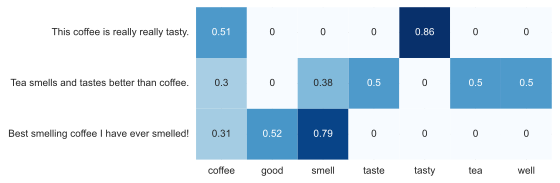

In [37]:
sns.heatmap(df, square=True, cmap='Blues', annot=True, cbar=False);

## Topic Modeling

### Matrix Decomposition

The document term matrix $X$ is a matrix just like any other in Linear Algebra. Just so, it defines a row space (the documents represented as linear combinations of terms), and column space (terms represented as a linear combination of documents). With this, there are a few matrix decomposition methods we can use to extract further information about these documents and terms.

In [5]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA

### Singular Value Decomposition

Singular Value Decomposition is a guaranteed decomposition for any rectangular matrix. It creates the following equality:

$$
X = U\Sigma V^\top
$$

**Breifly**:
- Each row of $U$ represents the corresponding document in terms of "topics directions" along the columns.
- The rows of $V$ (columns of $V^\top$) represent similarly represented version of the terms.
- The $\Sigma$ matrix contains the "variance explained" by each of these topics, sorted in descending order.

As far as naming goes:

- The analysis of these resulting matrices is called **Principal Components Analysis (PCA)**.
- When used with text data, this analysis is called **Latent Semantic Analysis (LSA)**.

In [39]:
corpus = tokenizer(df_coffee['spacy_doc'], join_tokens=True)

In [40]:
cv = TfidfVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)
# df = pd.DataFrame(X, index=corpus, columns=cv.get_feature_names_out())

Note, we use `TruncatedSVD` here because it's a more efficient implementation of SVD. PCA centers the data before running the algorithm, which is more "appropriate" but takes more time. This does cause a few inconsistencies in the "sorted" $\Sigma$.

In [41]:
lsa = TruncatedSVD(n_components=5)  # results only change for larger (unseen) values 

doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00488584, 0.08197822, 0.04774079, 0.04683595, 0.0350011 ])

In [42]:
topic_term = pd.DataFrame(lsa.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.192,0.124,0.090,0.103,0.117,0.072,0.068,0.167,0.082,0.256,...,0.280,0.146,0.079,0.144,0.195,0.248,0.077,0.070,0.066,0.148
1,0.072,-0.025,-0.142,0.065,0.120,-0.018,-0.019,-0.109,-0.003,-0.460,...,0.034,0.030,0.041,0.038,0.113,0.032,-0.017,-0.046,0.071,0.040
2,0.041,0.063,0.302,-0.045,-0.125,0.196,0.059,0.143,-0.007,-0.071,...,0.101,-0.058,0.059,-0.147,-0.108,0.109,0.059,0.126,-0.088,0.017
3,-0.121,0.009,-0.108,-0.007,0.007,-0.083,0.032,0.069,-0.012,-0.031,...,-0.170,-0.043,-0.044,-0.041,0.030,0.097,0.007,-0.014,-0.018,0.011
4,-0.083,-0.157,-0.131,0.008,-0.166,-0.029,-0.081,-0.072,-0.063,-0.070,...,0.080,-0.129,-0.059,0.039,-0.369,-0.068,0.032,0.020,-0.052,-0.085


In [43]:
# the third "topic"
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

sweet        0.280
chocolate    0.256
tone         0.248
cocoa        0.219
tart         0.195
structure    0.193
acidity      0.192
note         0.174
cedar        0.167
dark         0.159
Name: 0, dtype: float64

In [44]:
# the third "topic"
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

cocoa       0.476
nib         0.386
juicy       0.127
bright      0.120
tart        0.113
high        0.083
lemon       0.080
acidity     0.072
vibrant     0.071
balanced    0.065
Name: 1, dtype: float64

### Non-Negative Matrix Factorization

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is very similar to SVD. Here, we have the following decomposition.

$$
X = WH
$$

In this case though, all values in $W$ and $H$ are positive, and we can *approximate* this decomposition because all values in $X$ are positive.

In [45]:
nmf = NMF(4)  # here, the number will change the results
doc_topic = nmf.fit_transform(X)

In [46]:
topic_term = pd.DataFrame(nmf.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.935,0.389,0.000,0.612,0.863,0.000,0.084,0.017,0.353,0.822,...,1.422,0.902,0.233,1.219,1.005,0.604,0.089,0.000,0.556,0.651
1,0.000,0.173,0.000,0.046,0.000,0.000,0.132,0.617,0.113,1.568,...,0.029,0.133,0.000,0.176,0.177,0.399,0.185,0.119,0.000,0.136
2,0.546,0.483,0.959,0.103,0.000,0.609,0.300,0.657,0.210,0.710,...,0.896,0.237,0.293,0.031,0.198,0.699,0.274,0.438,0.000,0.352
3,0.492,0.164,0.000,0.364,0.488,0.018,0.113,0.284,0.167,0.000,...,0.504,0.334,0.231,0.310,0.705,0.737,0.193,0.048,0.261,0.378


In [47]:
# the third "topic"
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

savory        2.344
sweet         1.422
long          1.283
flavor        1.230
syrupy        1.219
juicy         1.123
sandalwood    1.121
structure     1.108
resonant      1.048
richly        1.024
Name: 0, dtype: float64

In [48]:
# the third "topic"
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    1.568
dark         1.294
milk         1.136
espresso     1.132
evaluate     1.105
small        1.102
chocolaty    1.015
cedar        0.617
fruit        0.524
floral       0.492
Name: 1, dtype: float64

As you can tell, this often produces more agreeable results than LSA.

### Latent Dirichlet Allocation (LDA)

LDA is a "generative" model that builds topics with the assumption that documents are generated based on a probability distribution of topics, and that topics are just a probability distribution of terms.

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
# these parameters require tuning ...
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=50)

X_topics = lda.fit_transform(X)

In [51]:
df_lda = pd.DataFrame(data = X_topics,
                      index = corpus)

In [52]:
# the third "topic"
topic = 0
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

balanced richly sweet spice tone apricot cocoa nib lilac coriander amber aroma cup deep sweet savory structure bright acidity syrupy smooth mouthfeel finish crisp juicy lead note apricot coriander short rich cocoa tone floral long 

high tone deeply sweet black currant honey sandalwood narcissus like flower roasted cacao nib aroma cup sweet tart structure juicy bright acidity syrupy smooth mouthfeel resonant finish consolidate note black currant honey short rich cocoa tone sandalwood long 

richly sweet fruit forward dried apricot cocoa nib star jasmine almond maple syrup aroma cup sweetly tart structure bright juicy acidity crisp syrupy mouthfeel long linger finish center dry apricot cocoa note support cedar like wood 



In [53]:
# the third "topic"
topic = 1
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

crisp sweetly nut tone hazelnut butter baker chocolate cherry cedar freesia like flower aroma cup sweet toned structure brisk acidity velvety smooth mouthfeel sweet finish consolidate invite nutty chocolate short spice tone floral long 

deeply sweet richly nut tone hazelnut butter magnolia like flower crisp pear cedar agave syrup aroma cup sweet structure gentle round acidity syrupy smooth mouthfeel finish consolidate deep nut rich aromatic wood 

fruit center crisply sweet bing cherry magnolia oak agave syrup baker chocolate aroma cup sweet tone structure gentle acidity satiny mouthfeel short finish lead note cherry baker chocolate round deep low tone flower long 



In [54]:
df_lda_terms = pd.DataFrame(data = lda.components_,
                            columns = cv.get_feature_names_out())

In [55]:
# the third "topic"
topic = 0
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

cocoa        173.110747
nib          139.787781
tart          93.593365
tone          87.230976
sweet         84.520523
juicy         75.065834
bright        73.636876
acidity       71.811638
structure     65.532983
floral        57.922316
Name: 0, dtype: float64

In [56]:
# the third "topic"
topic = 1
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    92.129124
bake         90.936349
sweet        68.870297
gentle       68.207650
cedar        62.051194
tone         61.053449
chocolaty    54.160901
nut          50.871263
hazelnut     50.762760
acidity      50.137965
Name: 1, dtype: float64

### Anchored Correlation Explanation (CorEx)

[CorEx](https://github.com/gregversteeg/corex_topic) is a discriminative model, which starts from $X$ (documents/words) to determine $Y$ (topics). CorEx looks for groups of words that are in the same topic, a.k.a. have high Total Correlation (TC), or convey the same information.

- If words are **tightly related** (always appear together in the same topic/document), TC will be high. This is a good topic.
- If the words are all **independent** (never appear together in the same document or topic), TC = 0. This is a bad topic.
- CorEx creates a partition across terms. I.e., **terms can only occur in a single topic**.

CorEx roughly follows this algorithm:
1. Look for a group of words that are both as broad (in many documents) and overlapping as possible (both together will lead to high TC), and call this a topic.
2. Repeat the process for another set of words (not overlapping with your previous group) with as high a TC as possible, and call this the next topic.

As we create more topics, each subsequent topic will have lower TC.

In [8]:
from corextopic import corextopic as ct

In [58]:
topic_model = ct.Corex(n_hidden=5,                        # number of topics
                       words=cv.get_feature_names_out(),  # list of terms in corpus
                       seed=1)

topic_model.fit(X, words=cv.get_feature_names_out(), docs=corpus)

In [59]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: espresso,evaluate,small,milk,chocolaty,nib,chocolate,cocoa,dark,juicy
1: almond,brisk,crisp,cut,like
2: deeply,fruit,richly,round,satiny,undertone
3: fresh,hint,sandalwood,zest
4: crisply,flower,gently,note,oak,rich,tone


Take a look at how you can use [anchor words](https://github.com/gregversteeg/corex_topic/tree/master#using-anchor-words) to guide the topic creation.

## ScatterText

Scattertext is great for
- Visually inspecting text
- Comparing/Contrasting corpora
- And more...

Check out Jason Kessler's GitHub project for more information: [here](https://github.com/JasonKessler/scattertext).

In [9]:
import scattertext as st

In [61]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [62]:
convention_df.head()

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [63]:
corpus = st.CorpusFromPandas(convention_df,
                             category_col='party',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [64]:
html = st.produce_scattertext_explorer(
        corpus,
        category='democrat',
        category_name='Democratic',
        not_category_name='Republican',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=convention_df['speaker'],
        )

In [65]:
with open('demo.html', 'wb') as f:
    f.write(html.encode('utf-8'))

## Sentiment Analysis with VADER

According to the documentation:

    VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. [...]
    
    Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [12]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             # "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled, ignored for seaborn plot below
             "Not bad at all"  # Capitalized negation
             ]

In [13]:
df_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    df_sentiment.append(vs)

In [69]:
df_sentiment = pd.DataFrame(df_sentiment,
                            index = sentences)

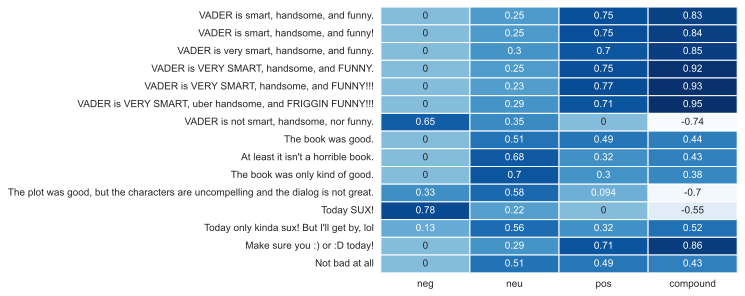

In [70]:
sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

# EXERCISES

## Exercise 1

Navigate to [Project Gutenberg](https://www.gutenberg.org/), and select a book you are interested in. Load the text (data) into your notebook by requesting the text *directly* from a URL. **You should not have to download any file**, rather your notebook should access the text directly. *Remember the `requests` package ...*

If the book you selected can **only** be downloaded, then you can download and load the text file as usual with `open`.

In [14]:
import requests

In [15]:
url = 'https://www.gutenberg.org/cache/epub/1400/pg1400-images.html'
response = requests.get(url)
if response.status_code == 200:
    text_content = response.text
else:
    print(f"Failed to retrieve the content. Status code: {response.status_code}")
    text_content = None

In [16]:
sample = text_content[200000:200500]
print(sample)

en you come to feast upon me. And now go!”
</p>
<p>
At the mention of each name, she had struck the table with her stick in a new
place. She now said, “Walk me, walk me!” and we went on again.
</p>
<p>
“I suppose there’s nothing to be done,” exclaimed Camilla, “but comply and
depart. It’s something to have seen the object of one’s love and duty for even
so short a time. I shall think of it with a melancholy satisfaction when I wake
up in the night. I wish Matthew could have that comfor


## Exercise 2

Find a way to break the book into at least 50 (ish) sensible "chunks". These could be chapters, paragraphs, sections, etc. Each section should be a single string, and you'll organize them into a list.

Load this corpus (list of strings) into a spaCy pipeline, and do an analysis on either Named Entities or Parts of Speech within each document. What is common? What is uncommon?

In [17]:
from bs4 import BeautifulSoup

In [18]:
soup = BeautifulSoup(response.text, 'html.parser')
text = soup.get_text()

In [19]:
chunks = [chunk.strip() for chunk in text.split("Chapter")]
chunks = [chunk for chunk in chunks if chunk]

In [32]:
len(chunks)

119

In [20]:
# using named Entities to identify common/uncommon
common_entities = {}
uncommon_entities = {}

In [21]:
for chunk in chunks:
    doc = nlp(chunk)
    for ent in doc.ents:
        entity_text = ent.text
        if entity_text in common_entities:
            common_entities[entity_text] += 1
        else:
            common_entities[entity_text] = 1

#uncommon entities (occur only once)
for entity, count in common_entities.items():
    if count < 10:
        uncommon_entities[entity] = count

# soring common entities by count
common_entities = {k: v for k, v in sorted(common_entities.items(), key=lambda item: item[1], reverse=True)}


In [33]:
display = 10
print("Sample of Common Named Entities:")
for i, (entity, count) in enumerate(common_entities.items()):
    if i < display:
        print(f"{entity}: {count}")

Sample of Common Named Entities:
Joe: 727
Herbert: 298
Havisham: 273
Wemmick: 265
Biddy: 220
Estella: 217
Jaggers: 214
two: 191
first: 169
one: 158


In [34]:
print("\nSample of Uncommon Named Entities:")
for i, (entity, count) in enumerate(uncommon_entities.items()):
    if i <display:
        print(f"{entity}: {count}")


Sample of Uncommon Named Entities:
Charles Dickens: 3
eBook: 7
July 1, 1998: 1
eBook #1400: 1
October 8, 2023
Language:: 1
English: 4
David Widger: 1
Great Expectations: 1
1867 Edition: 1
IV: 2


## Exercise 3

Use spaCy to filter your documents for only the most informative text. You might want to exclude stop words, or maybe you only want to include nouns!

In [36]:
corpus = []
corpus.append(text_content)

In [18]:
nlp.max_length = 1500000  

processed_corpus = []

for document in corpus:
    doc = nlp(document)
    processed_corpus.append(doc)


In [19]:
filtered_text = []
#excluding stop words
for doc in processed_corpus:
    non_stop_words = [token.text for token in doc if not token.is_stop]
    filtered_text.append(' '.join(non_stop_words))
 


In [20]:
filtered_text2 = []
#including only nouns
for doc in processed_corpus:
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    filtered_text2.append(' '.join(nouns))

## Exercise 4

Run a sentiment analysis on your data. Summarize your results by explaining how sentiment changes across sections. If you can, include a visualization or two!

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import random

In [40]:
sia = SentimentIntensityAnalyzer()
num_chunks_to_analyze = 1
random_chunks = random.sample(chunks, num_chunks_to_analyze)

for i, chunk in enumerate(random_chunks):
    sentiment_score = sia.polarity_scores(chunk)
    compound_score = sentiment_score['compound']
    
    sentiment_label = "Positive" if compound_score >= 0.05 else "Negative" if compound_score <= -0.05 else "Neutral"
    
    #print(f"Random Chunk {i + 1}:")
    #print(f"Text: {chunk}")
    print(f"Sentiment Compound Score: {compound_score:.2f}")
    print(f"Sentiment Label: {sentiment_label}\n")
    print("\n")

# Note: You can adjust 'num_random_chunks' to specify how many random chunks you want to analyze.


Sentiment Compound Score: 0.00
Sentiment Label: Neutral





In [42]:
import matplotlib.pyplot as plt

In [43]:
positive_count = 0
neutral_count = 0
negative_count = 0

for chunk in random_chunks:
    sentiment_score = sia.polarity_scores(chunk)
    compound_score = sentiment_score['compound']

    if compound_score >= 0.05:
        positive_count += 1
    elif compound_score <= -0.05:
        negative_count += 1
    else:
        neutral_count += 1
sentiment_labels = ['Positive', 'Neutral', 'Negative']
sentiment_counts = [positive_count, neutral_count, negative_count]

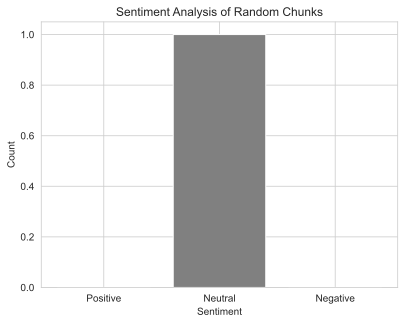

In [44]:
plt.bar(sentiment_labels, sentiment_counts, color=['green', 'grey', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Random Chunks')
plt.show()

## (BONUS) Exercise 5, optional

Build a topic model on your data, and summarize your results. Explain how this makes sense (or doesn't) given the context of the book. If it doesn't make sense, what should you consider changing?